In [1]:
%matplotlib notebook

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.fft

In [3]:
# Define parameters
fs = 1.e3
n_samples = 100
n_points = int(fs + 1)

In [4]:
# Generate time vector
t = np.arange(0., 1. + 1. / fs, 1 / fs)

In [5]:
# Function to generate a data sample with optional random phase
def data_sample(random_phase=False):
    f1 = 50
    f2 = 123
    A1 = 2
    A2 = 1
    A_noise = 0.5
    
    phase = 0
    if random_phase:
        phase = np.random.uniform(0, 2. * np.pi)

    x = A1**2 * np.sin(2. * np.pi * f1 * t) + A2**2 * np.sin(2. * np.pi * f2 * t + phase) + A_noise * np.random.randn(n_points)
    
    return x

# Generate data samples with random phases
data = np.array([data_sample(random_phase=True) for _ in range(n_samples)])

In [6]:
# Perform FFT on each data sample
ffts = np.array([scipy.fft.rfft(data[i, :]) for i in range(n_samples)])
freq = np.fft.rfftfreq(n_points, d=1. / fs)
n_freq = freq.shape[0]


In [7]:
# Calculate phase locking index matrix
res = np.empty((n_freq, n_freq))
for i in tqdm(range(0, n_freq)):
    for j in range(i, n_freq):
        s = ffts[:, i] * np.conj(ffts[:, j])
        res[i, j] = np.abs(np.sum(s)) / np.sum(np.abs(s))
        res[j, i] = res[i, j]


100%|████████████████████████████████████████| 501/501 [00:01<00:00, 403.35it/s]


<IPython.core.display.Javascript object>


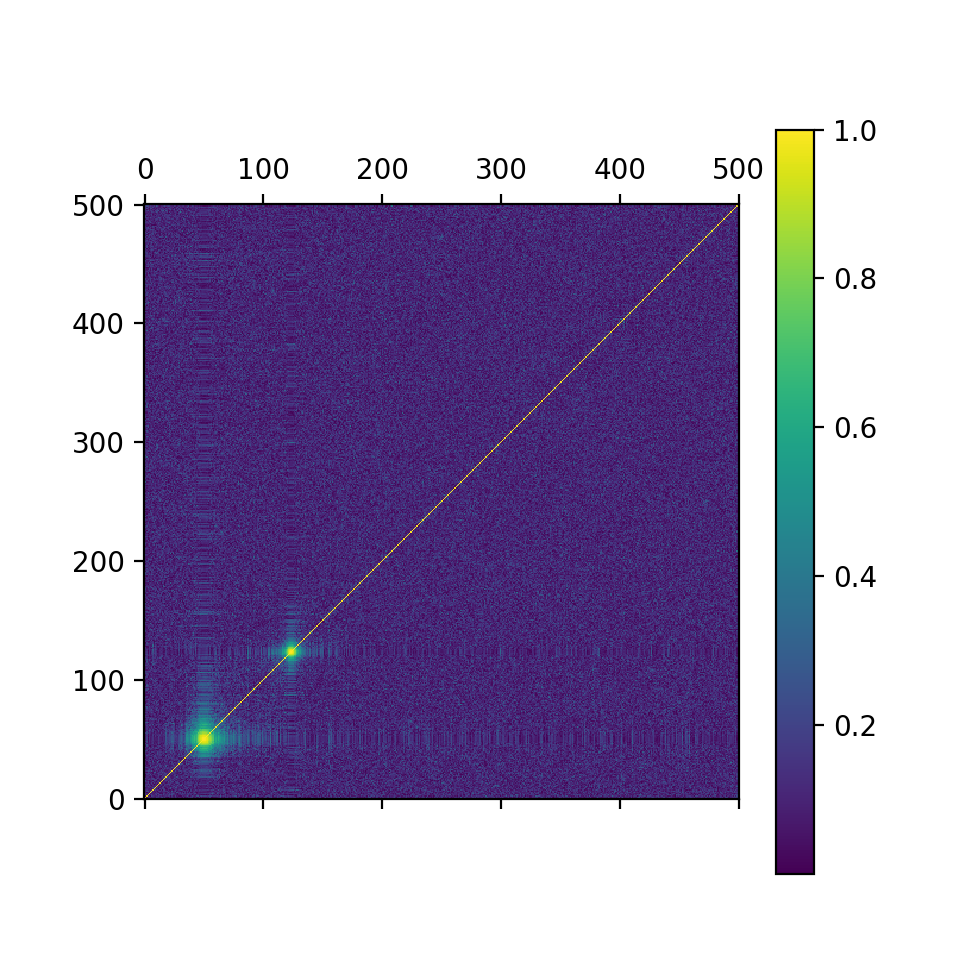

In [8]:
# Plot the phase locking index matrix
plt.matshow(res, origin='lower')
plt.colorbar()
plt.show()